# Linear Regression on House-price

## 1. Data Loading


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/house-price/house_prices.csv",index_col = 'Index')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187531 entries, 0 to 187530
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Title              187531 non-null  object 
 1   Description        184508 non-null  object 
 2   Amount(in rupees)  187531 non-null  object 
 3   Price (in rupees)  169866 non-null  float64
 4   location           187531 non-null  object 
 5   Carpet Area        106858 non-null  object 
 6   Status             186916 non-null  object 
 7   Floor              180454 non-null  object 
 8   Transaction        187448 non-null  object 
 9   Furnishing         184634 non-null  object 
 10  facing             117298 non-null  object 
 11  overlooking        106095 non-null  object 
 12  Society            77853 non-null   object 
 13  Bathroom           186703 non-null  object 
 14  Balcony            138596 non-null  object 
 15  Car Parking        84174 non-null   object 
 16  Ownersh

In [4]:
df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
Index,,,,,,,,,,,,,,,,,,,,
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


Let's decide the independent values (features)

In [5]:
df.columns

Index(['Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)',
       'location', 'Carpet Area', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony',
       'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area'],
      dtype='object')

In [6]:
features = ['location','Carpet Area', 'Status','Floor','Transaction',
            'Furnishing','Bathroom','Balcony']
X = df[features]
X.describe()

,location,Carpet Area,Status,Floor,Transaction,Furnishing,Bathroom,Balcony
count,187531,106858,186916,180454,187448,184634,186703,138596
unique,81,2758,1,947,4,3,11,11
top,new-delhi,1000 sqft,Ready to Move,2 out of 4,Resale,Semi-Furnished,2,2
freq,27599,5285,186916,12433,144172,88318,93007,51809


## 1.1 Target Variable Analysis (Price)
We first analyze the distribution of the target variable to understand its shape, skewness, and presence of outliers.


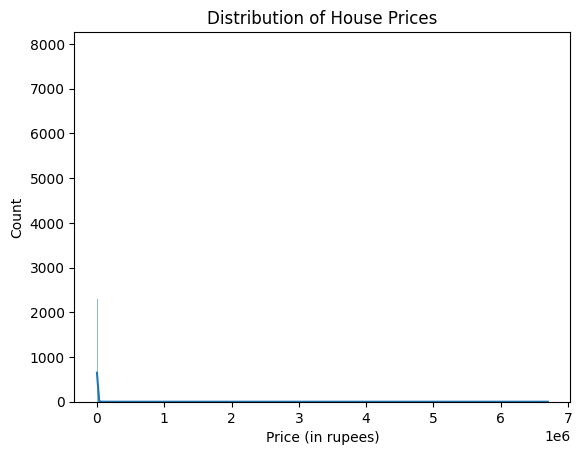

Skewness: 177.11336980623065


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Price (in rupees)'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (in rupees)")
plt.show()

print("Skewness:", df['Price (in rupees)'].skew())

## 1.2 Outlier Detection Using Boxplots
Boxplots help identify extreme values that may negatively affect linear regression.


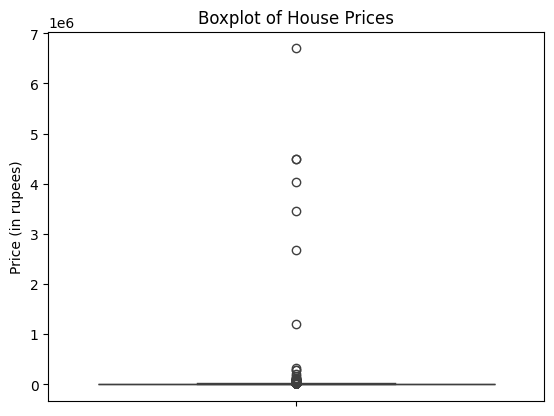

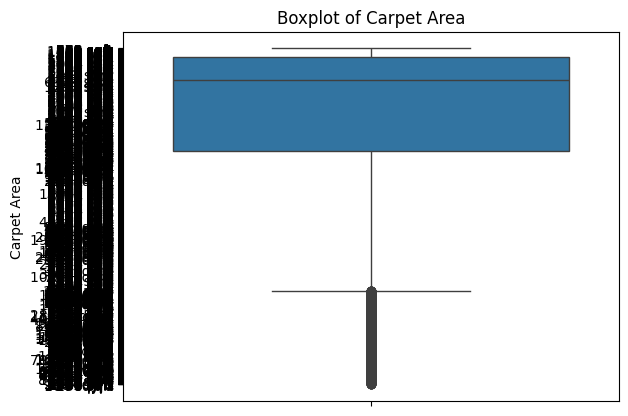

In [8]:
sns.boxplot(y=df['Price (in rupees)'])
plt.title("Boxplot of House Prices")
plt.show()

sns.boxplot(y=df['Carpet Area'])
plt.title("Boxplot of Carpet Area")
plt.show()

## 1.3 Log Transformation of Target Variable
Since price data is often right-skewed, we apply a log transformation to improve model performance.


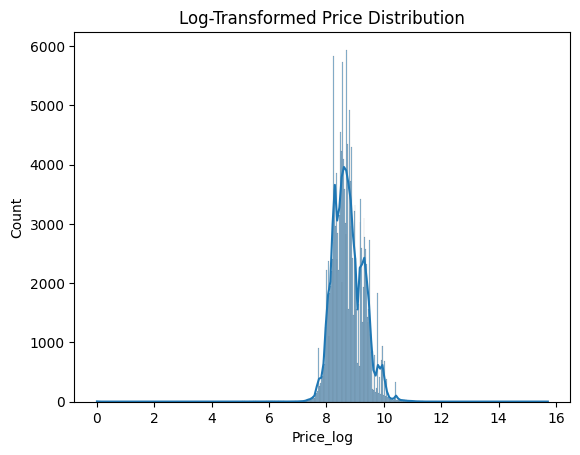

Skewness after log: 0.053854378084211875


In [9]:
import numpy as np

df['Price_log'] = np.log1p(df['Price (in rupees)'])

sns.histplot(df['Price_log'], kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

print("Skewness after log:", df['Price_log'].skew())

## Categorical Techniques

**location**  - we have 81 unique  - so we can use top 10 values as one-hot and rest of the values we put in the column "other" - use "unknown"

 **carpet area** - we need to remove the text (sqft) and convert into float. - use 
 "median" to fill nan

**status**  - we remove this from features because of it's only one unqiue value
it won't give any thing for models to learn

**floor** - we need to remove the mixed values (10 out of 11) - we can have the first value(10) - use "median"

**transaction**  - we can use one-hot  - use "unknown"

**bathroom** - keep it as is's - use "median"

**balcony** - keep it as it's - use "median"

**furnishing** - one-hot  - use "unknown"


## 2. Data Cleaning & Preprocessing

In [10]:
#location - we have no null values in location so let's  do encode 

important_location = df['location'].value_counts().nlargest(n=10)
df['location'] = df['location'].apply(lambda x: x if x in important_location else "other")

dummies = pd.get_dummies(df['location'],prefix = "location")
df = pd.concat([df,dummies],axis = 1)
df.drop(columns = ['location'],inplace = True)

In [11]:
#let's check the result for location

df.head()

,Title,Description,Amount(in rupees),Price (in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,facing,...,location_bangalore,location_chennai,location_faridabad,location_greater-noida,location_gurgaon,location_hyderabad,location_jaipur,location_kolkata,location_new-delhi,location_other
Index,,,,,,,,,,,,,,,,,,,,,
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,...,False,False,False,False,False,False,False,False,False,True
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,...,False,False,False,False,False,False,False,False,False,True
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,...,False,False,False,False,False,False,False,False,False,True
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,...,False,False,False,False,False,False,False,False,False,True
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,...,False,False,False,False,False,False,False,False,False,True


In [12]:
#first we remove the string and fill the Nan with median values

df['Carpet Area'] = (
    df['Carpet Area']
    .str.extract(r"(\d+)").astype(float)
)
# fillthe missing values 

df['Carpet Area'] = df['Carpet Area'].fillna(df['Carpet Area'].median())

#check the result for carpet
df['Carpet Area']

Index
0          500.0
1          473.0
2          779.0
3          530.0
4          635.0
           ...  
187526    1000.0
187527    1000.0
187528    1250.0
187529    1000.0
187530    1000.0
Name: Carpet Area, Length: 187531, dtype: float64

In [13]:
#floor - we do the things same like we did for carpet

df['Floor'] = (
    df['Floor']
    .str.extract(r"(\d+)",expand = True).astype(float)
)
df['Floor'] = df['Floor'].fillna(df['Floor'].median())

#check the type and values
df['Floor']


Index
0         10.0
1          3.0
2         10.0
3          1.0
4         20.0
          ... 
187526     2.0
187527     4.0
187528     1.0
187529     2.0
187530     5.0
Name: Floor, Length: 187531, dtype: float64

In [14]:
#transaction - we need to fill and encode

df['Transaction'] = df['Transaction'].fillna('Unknown')

transaction_dummies = pd.get_dummies(df['Transaction'],prefix = 'transaction', dtype = 'uint8')

df = pd.concat([df,transaction_dummies], axis = 1)

df.drop( columns = ['Transaction'],axis = 1,inplace = True)


In [15]:
#bathroom  - for Nan we use median coz we can't assume missing = zero 
#the column bathroom is an object first we need to convert into numeric

df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Bathroom']

Index
0         1.0
1         2.0
2         2.0
3         1.0
4         2.0
         ... 
187526    3.0
187527    3.0
187528    3.0
187529    2.0
187530    4.0
Name: Bathroom, Length: 187531, dtype: float64

In [16]:
# balcony is also a object we do the same thing like we did for bathroom

df['Balcony'] = pd.to_numeric(df['Balcony'], errors ='coerce')
df['Balcony'] = df['Balcony'].fillna(df['Balcony'].median())

df['Balcony']

Index
0         2.0
1         2.0
2         2.0
3         1.0
4         2.0
         ... 
187526    3.0
187527    2.0
187528    2.0
187529    2.0
187530    4.0
Name: Balcony, Length: 187531, dtype: float64

In [17]:
df['Furnishing'] = df['Furnishing'].fillna("Unknown")

df = pd.get_dummies(
    df,
    columns=['Furnishing'],
    prefix = 'furnishing',
    dtype = 'uint8'
)

## 3. Feature Selection

In [18]:
features = ['Carpet Area', 'Floor','Bathroom', 'Balcony',
           'location_ahmedabad', 'location_bangalore',
       'location_chennai', 'location_faridabad', 'location_greater-noida',
       'location_gurgaon', 'location_hyderabad', 'location_jaipur',
       'location_kolkata', 'location_new-delhi', 'location_other',
       'transaction_New Property', 'transaction_Other',
       'transaction_Rent/Lease', 'transaction_Resale', 'transaction_Unknown',
       'furnishing_Furnished', 'furnishing_Semi-Furnished',
       'furnishing_Unfurnished', 'furnishing_Unknown']
#final check for missing values
df[features].isna().sum()

Carpet Area                  0
Floor                        0
Bathroom                     0
Balcony                      0
location_ahmedabad           0
location_bangalore           0
location_chennai             0
location_faridabad           0
location_greater-noida       0
location_gurgaon             0
location_hyderabad           0
location_jaipur              0
location_kolkata             0
location_new-delhi           0
location_other               0
transaction_New Property     0
transaction_Other            0
transaction_Rent/Lease       0
transaction_Resale           0
transaction_Unknown          0
furnishing_Furnished         0
furnishing_Semi-Furnished    0
furnishing_Unfurnished       0
furnishing_Unknown           0
dtype: int64

In [19]:
#we drop the row which contain empty values in price
df = df.dropna(subset=["Price (in rupees)"])


****Here we actually done the cleaning part now move to the models for prediction****
to do that we choose the features from columns for X and Y is the target value(Price)

## 4. Model Training (Linear Regression)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
model = LinearRegression()

In [22]:
Y = df["Price (in rupees)"]
X = df[features]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.2)

In [23]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

## 5. Model Evaluation

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

**Actual vs Predicted**

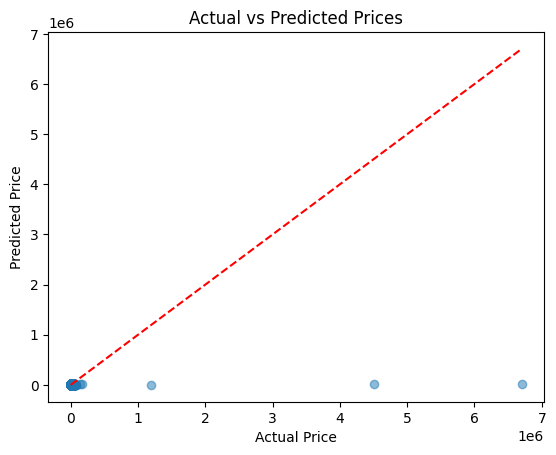

In [25]:
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

**Residual Plot**

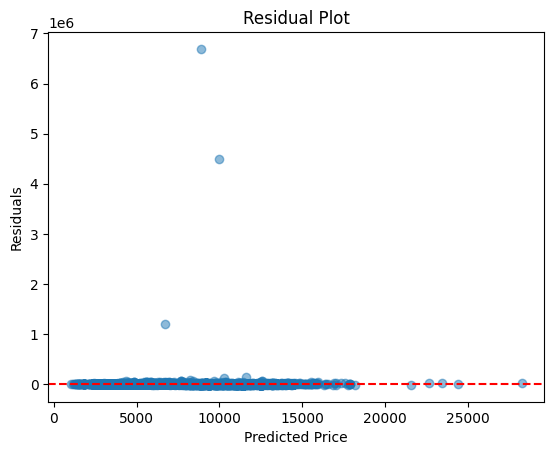

In [26]:
residuals = Y_test - Y_pred

plt.scatter(Y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Metrics**

In [27]:


mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 2949.3416948651684
RMSE: 44391.87270636156
R²: 0.00410150725524816
